In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from subprocess import Popen, PIPE, call


In [6]:
path_sun = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/sun_all/'
path_mrcv = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mrcv_all/'
path_mites = '/home/juan/Desktop/juan/bio/mirna_mite/data/tracker.gff3'
path_mirna_fasta = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirnas.y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mirna_mite/data/mature.fa'
path_mirbase_res = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirnay_mature.csv'

In [7]:
#SUN DATA

Sun clusters: 157492
Sun miRNA: 154


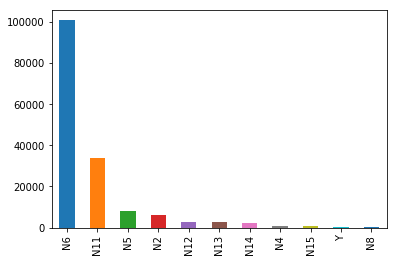

In [8]:
df_sun = pd.read_csv(path_sun + 'Results.txt', sep='\t')
df_sun.Name = 'sun_' + df_sun.Name.astype(str)
print('Sun clusters: ' + str(len(df_sun.index)))
df_sun.MIRNA.value_counts().plot('bar')
df_sun_m = df_sun[df_sun.MIRNA == 'Y']
print('Sun miRNA: ' + str(len(df_sun_m.index)))


In [9]:
#MRCV data

MRCV clusters: 38532
MRCV miRNA: 135


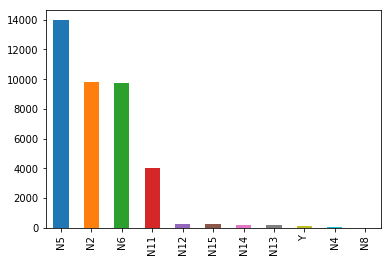

In [10]:
df_mrcv = pd.read_csv(path_mrcv + 'Results.txt', sep='\t')
df_mrcv.Name = 'mrcv_' + df_mrcv.Name.astype(str)
print('MRCV clusters: ' + str(len(df_mrcv.index)))
df_mrcv.MIRNA.value_counts().plot('bar')
df_mrcv_m = df_mrcv[df_mrcv.MIRNA == 'Y']
print('MRCV miRNA: ' + str(len(df_mrcv_m.index)))


In [11]:
#MITEs data

In [12]:
df_mites = pd.read_csv(path_mites, sep='\t')
df_mites.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('MITEs: ' + str(len(df_mites.index)))


MITEs: 1211339


In [13]:
#separate MITEs by chromosome
df_anns = {}
for chromosome in df_mites.seqname.unique():
    df_anns[chromosome] = df_mites[df_mites.seqname == chromosome]


In [14]:
df_all = pd.concat([df_sun_m, df_mrcv_m])
total_mirna = len(df_all.index)
print('Total miRNA mrcv + sun: ' + str(total_mirna))

Total miRNA mrcv + sun: 289


In [15]:
df_all['seqname'] = df_all['#Locus'].str.split(':').str[0]
df_all['position'] = df_all['#Locus'].str.split(':').str[1]
df_all['start'] = df_all.position.str.split('-').str[0].astype(int)
df_all['end'] = df_all.position.str.split('-').str[1].astype(int)

In [16]:
df_all.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Long,20,21,22,23,24,seqname,position,start,end
2788,1A:309399491-309399581,sun_Cluster_2789,91,459,3.635,4,0.007,-,ACGGCAUAGAGGCACUGCAAA,196,...,0,94,298,26,0,5,1A,309399491-309399581,309399491,309399581
4364,1A:492271831-492271941,sun_Cluster_4365,111,441,3.492,2,1.000,+,GAGGAGGAGGAGCAGGACAAG,336,...,0,70,360,1,1,0,1A,492271831-492271941,492271831,492271941


In [17]:
df_all.columns

Index(['#Locus', 'Name', 'Length', 'Reads', 'RPM', 'UniqueReads', 'FracTop',
       'Strand', 'MajorRNA', 'MajorRNAReads', 'Complexity', 'DicerCall',
       'MIRNA', 'PhaseScore', 'Short', 'Long', '20', '21', '22', '23', '24',
       'seqname', 'position', 'start', 'end'],
      dtype='object')

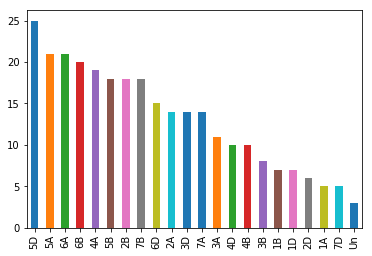

In [18]:
df_all.seqname.value_counts().plot('bar')

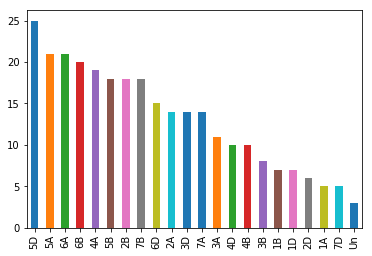

In [19]:
df_all.seqname.value_counts().plot('bar')

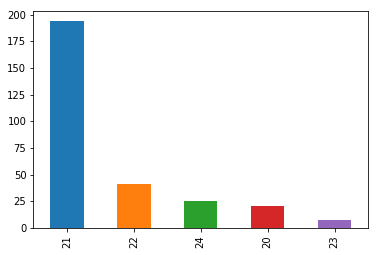

In [20]:
df_all.DicerCall.value_counts().plot('bar')

In [21]:
#cross with mirbase

In [22]:
#save miRNAs in file

In [25]:
records = []
for k,v in df_all.iterrows():
    record = SeqRecord(Seq(v.MajorRNA), id=v.Name, description="")
    records.append(record)
SeqIO.write(records, path_mirna_fasta, 'fasta')
path_mirna_fasta

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/mirnas.y.fasta'

In [28]:
outmft = "6 qseqid sseqid qstart qend sstart send mismatch gaps pident evalue length qlen slen qcovs"
cmd = "blastn -task blastn -query %s -subject %s -outfmt '%s'  > %s"
cmd =  cmd % (path_mirna_fasta, path_mirbase,outmft, path_mirbase_res)
print(cmd)

blastn -task blastn -query /home/juan/Desktop/juan/bio/mirna_mite/data/res/mirnas.y.fasta -subject /home/juan/Desktop/juan/bio/mirna_mite/data/mature.fa -outfmt '6 qseqid sseqid qstart qend sstart send mismatch gaps pident evalue length qlen slen qcovs'  > /home/juan/Desktop/juan/bio/mirna_mite/data/res/mirnay_mature.csv


In [29]:
df_mirbase = pd.read_csv(path_mirbase_res, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)

20450


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs
0,sun_Cluster_4365,mmu-miR-6919-3p,2,13,12,1,0,0,100.0,0.34,12,21,21,57
1,sun_Cluster_4365,oan-miR-1345,7,18,4,15,0,0,100.0,0.34,12,21,18,57


In [30]:
df_mirbase = df_mirbase[df_mirbase.length >= df_mirbase.qlen - 3]
print(len(df_mirbase.index))
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= 3]
print(len(df_mirbase.index))


17723
17723


In [31]:
len(df_mirbase.qseqid.unique().tolist())

186

In [32]:
df_mirbase = df_mirbase[['qseqid','sseqid']]
df_mirbase = df_mirbase.drop_duplicates(subset='qseqid', keep='first')

In [33]:
df_res = pd.merge(df_all, df_mirbase, left_on='Name', right_on='qseqid', how='left')

In [34]:
len(df_res.index)

289

In [35]:
df_res.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,21,22,23,24,seqname,position,start,end,qseqid,sseqid
0,1A:309399491-309399581,sun_Cluster_2789,91,459,3.635,4,0.007,-,ACGGCAUAGAGGCACUGCAAA,196,...,298,26,0,5,1A,309399491-309399581,309399491,309399581,NaN,NaN
1,1A:492271831-492271941,sun_Cluster_4365,111,441,3.492,2,1.000,+,GAGGAGGAGGAGCAGGACAAG,336,...,360,1,1,0,1A,492271831-492271941,492271831,492271941,NaN,NaN


In [36]:
#SEARCH for overlapped

In [38]:
yeses = 0
for k, v in df_res.iterrows():
    ss = False
    if v.seqname == 'Un':
        continue
    df_ann_c = df_anns[v.seqname]
    df_ann_c_overlaps = df_ann_c[(df_ann_c.end >= v.start) & (df_ann_c.start <= v.end)]
    if len(df_ann_c_overlaps.index) > 0:
        print(k,v.Name,v.sseqid, v.seqname, v.start, v.end)
        yeses += 1
perc_mite = yeses * 100 / total_mirna
perc_mite

22 sun_Cluster_33132 nan 2B 482720682 482720772
61 sun_Cluster_82408 nan 4D 142764794 142764971
67 sun_Cluster_86168 aof-miR167a 5A 53591761 53591922
126 sun_Cluster_124253 tae-miR9655-3p 6D 51972870 51973143
139 sun_Cluster_136100 nan 7A 668530089 668530164
182 mrcv_Cluster_11066 nan 3A 19302858 19302967
188 mrcv_Cluster_13328 nan 3B 253488740 253488969
193 mrcv_Cluster_15820 nan 3D 472405004 472405087
194 mrcv_Cluster_15952 nan 3D 508204967 508205061
197 mrcv_Cluster_16700 nan 4A 67171701 67171964
207 mrcv_Cluster_19013 nan 4B 429353825 429354083
246 mrcv_Cluster_27434 nan 6A 23496419 23496608
269 mrcv_Cluster_31324 nan 6D 361524549 361524681
275 mrcv_Cluster_33529 nan 7A 668530084 668530160
277 mrcv_Cluster_33900 nan 7B 34679821 34679956
280 mrcv_Cluster_34208 nan 7B 145795106 145795346


5.536332179930795